### Distributed Quantum Computing

Distributed quantum computing is rapidly emerging as a transformative approach to overcome the limitations of current quantum systems. By linking multiple quantum processors through a network, this paradigm allows for the distribution of quantum tasks across several nodes, significantly enhancing computational power and resilience.

Distributed quantum computing leverages the principles of quantum entanglement and quantum teleportation to enable secure and efficient communication between different quantum nodes. Each node in the network processes a portion of the overall computation, and through quantum entanglement, these nodes remain interconnected, allowing for the seamless transfer of quantum information.

The promise of distributed quantum computing lies in its potential to solve problems that are currently beyond the reach of even the most powerful classical supercomputers. Complex optimization problems, advanced simulations in chemistry and physics, and cryptography are just a few areas where distributed quantum systems could make a significant impact.

One of the key advantages of this approach is scalability. As quantum processors are notoriously difficult to scale due to decoherence and noise, distributing the computational load across multiple quantum systems allows for more robust performance. This not only enhances the computational capacity but also improves fault tolerance, making quantum computations more reliable.

Currently, the field of distributed quantum computing is in its infancy, with researchers and companies around the world exploring various architectures and protocols to make it a reality. Experimental demonstrations have shown the feasibility of linking quantum processors, and as quantum networking technologies continue to evolve, the vision of a global quantum network—often referred to as the "quantum internet"—is becoming increasingly plausible.

Looking ahead, the future of distributed quantum computing is incredibly promising. As quantum technologies continue to mature, we can expect to see the development of more sophisticated quantum networks that will pave the way for large-scale quantum computing applications. The collaboration between academic institutions and industry will be crucial in driving this progress, ultimately leading to breakthroughs that could revolutionize fields as diverse as cryptography, materials science, and artificial intelligence.

In conclusion, distributed quantum computing represents a bold step forward in the evolution of quantum technology. By harnessing the power of multiple quantum processors, this approach holds the potential to unlock new computational capabilities and bring us closer to realizing the full promise of quantum computing. As research and development in this area continue to advance, distributed quantum computing is poised to become a cornerstone of the quantum revolution.

In [1]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_histogram, plot_bloch_multivector
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# Initialize the simulator
simulator = AerSimulator()

In [3]:
# Create a quantum circuit with 3 qubits and 2 classical bits
qc = QuantumCircuit(3, 2)

In [4]:
# Step 1: Create an entangled pair between qubit 1 and qubit 2
qc.h(1)
qc.cx(1, 2)

In [5]:
# Step 2: Prepare the qubit to be teleported (qubit 0) in an arbitrary state
qc.u(0.3, 0.2, 0.1, 0)  # Arbitrary state preparation for qubit 0

In [6]:
# Step 3: Entangle the qubit to be teleported with qubit 1
qc.cx(0, 1)
qc.h(0)

In [7]:
# Step 4: Measure qubit 0 and qubit 1
qc.measure([0, 1], [0, 1])

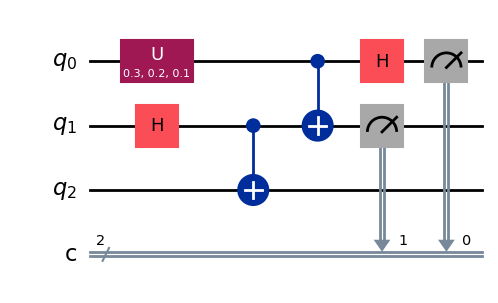

In [8]:
# Draw the quantum circuit
qc.draw('mpl')
plt.show()

In [9]:
# Transpile the circuit for the simulator
compiled_circuit = transpile(qc, simulator)

In [10]:
# Simulate the circuit to get measurement results
result = simulator.run(compiled_circuit).result()

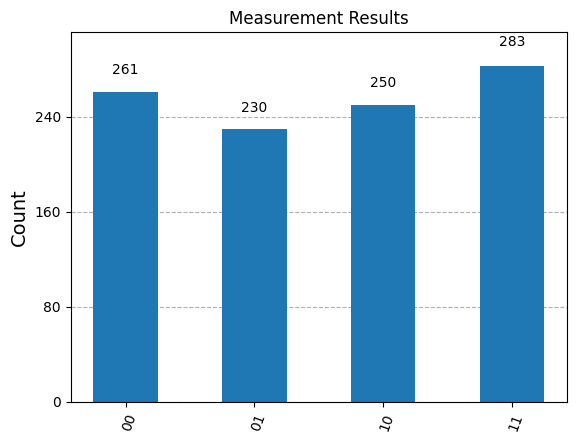

In [11]:
# Get and plot the measurement results
counts = result.get_counts(compiled_circuit)
plot_histogram(counts)
plt.title("Measurement Results")
plt.show()

In [12]:
# Now let's simulate the same circuit without measurement to get the statevector
qc_no_measure = QuantumCircuit(3)


In [13]:
# Repeat the operations up to before the measurement
qc_no_measure.h(1)
qc_no_measure.cx(1, 2)
qc_no_measure.u(0.3, 0.2, 0.1, 0)
qc_no_measure.cx(0, 1)
qc_no_measure.h(0)
qc_no_measure.cx(1, 2)
qc_no_measure.cz(0, 2)

In [14]:
# Get the statevector of the final state
statevector = Statevector.from_instruction(qc_no_measure)

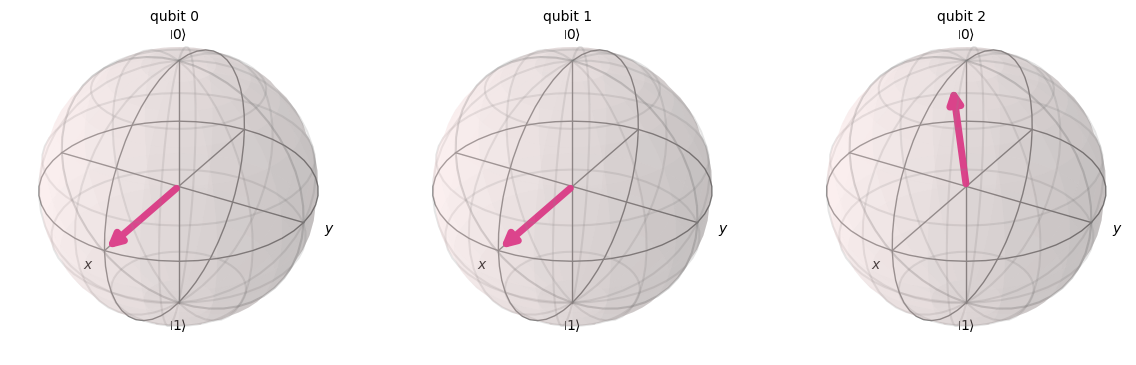

In [15]:
# Plot the final state on the Bloch sphere
plot_bloch_multivector(statevector)
plt.show()